In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import requests
from PIL import Image
from io import BytesIO

#Loading in the dataset
df = pd.read_csv("downloads/2025_MLB_Stats.csv")

In [110]:
print(df)

               Name   Team  wRC   wOBA    OPS    SLG    OBP   Off    ISO  \
0       Aaron Judge    NYY  111  0.468  1.160  0.711  0.449  53.7  0.369   
1     Shohei Ohtani    LAD   98  0.405  0.978  0.600  0.378  41.6  0.326   
2    Kyle Schwarber    PHI   97  0.411  0.974  0.593  0.382  36.9  0.335   
3       Cal Raleigh    SEA   89  0.396  0.957  0.597  0.360  34.2  0.345   
4      Kyle Stowers    MIA   76  0.398  0.943  0.571  0.372  28.3  0.276   
..              ...    ...  ...    ...    ...    ...    ...   ...    ...   
152    Luis Rengifo    LAA   34  0.274  0.616  0.325  0.290 -14.9  0.081   
153   Brenton Doyle    COL   30  0.271  0.616  0.344  0.272 -17.9  0.120   
154    Eric Wagaman    MIA   31  0.269  0.613  0.338  0.275 -15.1  0.106   
155  Ke'Bryan Hayes  2 Tms   29  0.256  0.575  0.297  0.278 -18.3  0.060   
156      Joey Ortiz    MIL   28  0.260  0.583  0.314  0.269 -14.2  0.098   

     wRC+  ...  wOBA Value  OPS Value  SLG Value  OBP Value  Off Value  \
0     207  ..

In [111]:
#Add player MLBid number
import pandas as pd
from pybaseball import playerid_lookup

# Load original dataset
df = pd.read_csv("downloads/2025_MLB_Stats.csv")

# Function to get MLB ID from player name
def get_mlb_id(name):
    try:
        first, last = name.split(" ", 1)
        result = playerid_lookup(last, first)
        if not result.empty:
            return int(result.iloc[0]["key_mlbam"])
    except Exception as e:
        print(f"Error for '{name}': {e}")
    return None

# Apply to the 'Name' column
print("Looking up MLB IDs for each player...")
df['mlb_id'] = df['Name'].apply(get_mlb_id)

# Display how many were found
found_count = df['mlb_id'].notnull().sum()

# Save the updated dataset
df.to_csv("downloads/2025_MLB_Stats_with_IDs.csv", index=False)

Looking up MLB IDs for each player...


In [112]:
print(df)


               Name   Team  wRC   wOBA    OPS    SLG    OBP   Off    ISO  \
0       Aaron Judge    NYY  111  0.468  1.160  0.711  0.449  53.7  0.369   
1     Shohei Ohtani    LAD   98  0.405  0.978  0.600  0.378  41.6  0.326   
2    Kyle Schwarber    PHI   97  0.411  0.974  0.593  0.382  36.9  0.335   
3       Cal Raleigh    SEA   89  0.396  0.957  0.597  0.360  34.2  0.345   
4      Kyle Stowers    MIA   76  0.398  0.943  0.571  0.372  28.3  0.276   
..              ...    ...  ...    ...    ...    ...    ...   ...    ...   
152    Luis Rengifo    LAA   34  0.274  0.616  0.325  0.290 -14.9  0.081   
153   Brenton Doyle    COL   30  0.271  0.616  0.344  0.272 -17.9  0.120   
154    Eric Wagaman    MIA   31  0.269  0.613  0.338  0.275 -15.1  0.106   
155  Ke'Bryan Hayes  2 Tms   29  0.256  0.575  0.297  0.278 -18.3  0.060   
156      Joey Ortiz    MIL   28  0.260  0.583  0.314  0.269 -14.2  0.098   

     wRC+  ...  OPS Value  SLG Value  OBP Value  Off Value  ISO Value  \
0     207  ...

In [113]:
# Select the stats to include in the radar chart
stats_columns = ['wRC', 'wOBA', 'OPS', 'SLG', 'OBP', 'ISO', 'wRC+', 'fWAR', 'xwOBA']

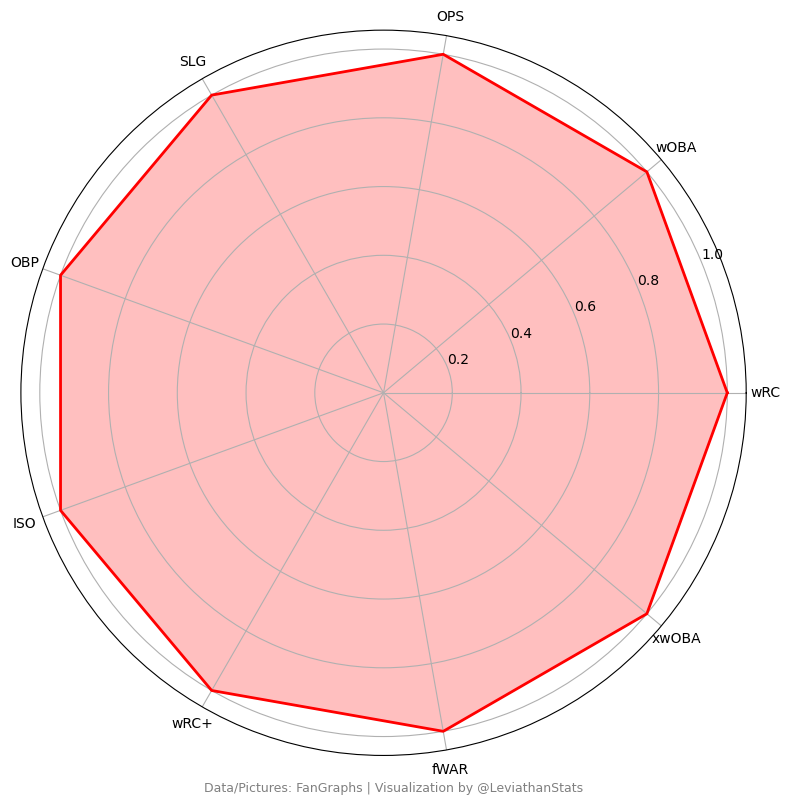

In [122]:
# Normalize the stats across the whole dataset
normalized_df = df.copy()
normalized_df[stats_columns] = (
    df[stats_columns] - df[stats_columns].min()
) / (df[stats_columns].max() - df[stats_columns].min())

# Get player's normalized stats
player_n_stats = normalized_df[normalized_df["Name"] == "Aaron Judge"]
normalized_values = player_n_stats[stats_columns].values.flatten()

# Prepare radar chart values
labels = stats_columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Repeat the first value and angle to close the radar chart loop
values = normalized_values.tolist()
values += values[:1]
angles += angles[:1]

# Plot radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='red', linewidth=2)
ax.fill(angles, values, color='red', alpha=0.25)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

# Add footnote below the chart
plt.figtext(
    0.5, 0.001,
    "Data/Pictures: FanGraphs | Visualization by @LeviathanStats",
    wrap=True,
    horizontalalignment='center',
    fontsize=9,
    color='gray'
)


os.makedirs("radars", exist_ok=True)
plt.savefig(f"radars/{player_name}_radar.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()